In [3]:
!wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv


File 'bbc_text_cls.csv' already there; not retrieving.



In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense,Input, GlobalMaxPooling1D
from tensorflow.keras.layers import Conv1D, MaxPool1D, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [7]:
df = pd.read_csv('bbc_text_cls.csv')
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [8]:
# Convert targets to ints
df['targets'] = df['labels'].astype("category").cat.codes

# Number of classes
K =df['targets'].max()+1
K

5

In [10]:
# train test split
df_train, df_test = train_test_split(df,test_size=0.3)

#convert sentences to sequences

MAX_VOCAB_SIZE = 2000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train['text'])
sequences_train = tokenizer.texts_to_sequences(df_train['text'])
sequences_test = tokenizer.texts_to_sequences(df_test['text'])


# Get word -> index mapping
word2idx = tokenizer.word_index
V = len(word2idx)
print(' %s unique tokens' %V)



 27888 unique tokens


In [11]:
# Pad sequences to get N x T matrix

data_train = pad_sequences(sequences_train)
print(data_train.shape)

# get sequence lenght 
T = data_train.shape[1]

(1557, 3493)


In [12]:
# Pad new (unseen data)
data_test = pad_sequences(sequences_test,maxlen=T)
print("Shape of data", data_test.shape)

Shape of data (668, 3493)


In [19]:
# Embedding size
D = 50

i = Input(shape=(T,))
x = Embedding(V+1,D)(i)
x = Conv1D(32, 3, activation='relu')(x)
x = MaxPool1D(3)(x)
x = Conv1D(64,3,activation='relu')(x)
x = MaxPool1D(3)(x)
x = Conv1D(128,3,activation='relu')(x)


x = GlobalMaxPooling1D()(x)
x = Dense(K)(x)

model = Model(i,x)
model.summary()

# compile and train
model.compile(
    loss = SparseCategoricalCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['accuracy']
    )

print("Trainign model...")
r = model.fit(
    data_train,
    df_train['targets'],
    epochs = 50,
    validation_data=(data_test,df_test['targets'])

)
 

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 3493)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_3 (Embedding)         │ (None, 3493, 50)       │     1,394,450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 3491, 32)       │         4,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 1163, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 1161, 64)       │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 387, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 385, 128)       │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_3          │ (None, 128)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,430,839 (5.46 MB)

 Trainable params: 1,430,839 (5.46 MB)

 Non-trainable params: 0 (0.00 B)

Trainign model...
Epoch 1/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 117ms/step - accuracy: 0.2185 - loss: 1.6071 - val_accuracy: 0.2485 - val_loss: 1.5902
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - accuracy: 0.3533 - loss: 1.5247 - val_accuracy: 0.5853 - val_loss: 1.0426
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.6463 - loss: 0.8159 - val_accuracy: 0.8189 - val_loss: 0.5333
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - accuracy: 0.9480 - loss: 0.2577 - val_accuracy: 0.9237 - val_loss: 0.3090
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - accuracy: 0.9940 - loss: 0.0413 - val_accuracy: 0.9207 - val_loss: 0.2764
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.9998 - loss: 0.0099 - val_accuracy: 0.9356 - val_loss: 0.2816
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - accuracy: 1.0000 - loss: 0.0036 - val_accuracy: 0.9401 - val_loss: 0.2767
Epoch 8/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - accuracy: 1.0000 - loss: 0.0018 - v

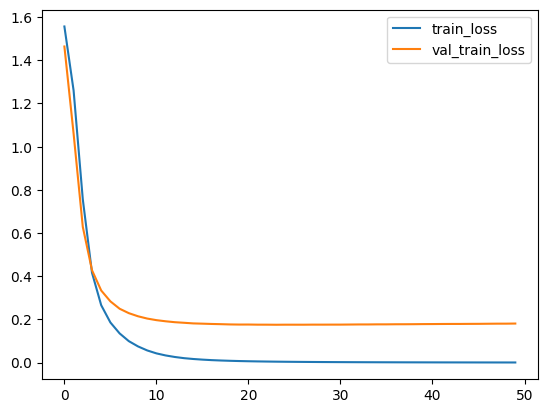

In [17]:
# Loss per iter

plt.plot(r.history['loss'],label='train_loss')
plt.plot(r.history['val_loss'],label='val_train_loss')
plt.legend()

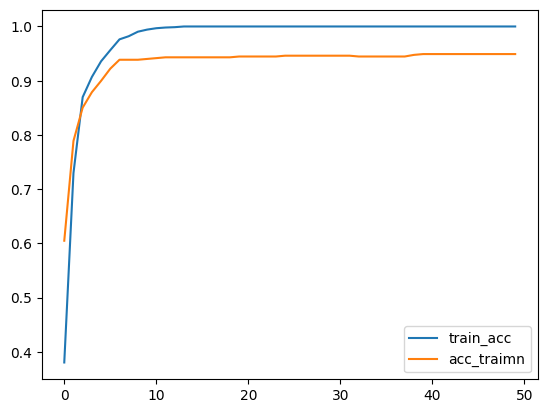

In [18]:
# Accuracy per iter

plt.plot(r.history['accuracy'],label='train_acc')
plt.plot(r.history['val_accuracy'],label='acc_traimn')
plt.legend()